# Raupのモデル
$$
\mathbf{r}(\theta, \phi| W, T, D) = W^{\frac{\theta}{2\pi}}
\begin{pmatrix}
\cos \theta & - \sin \theta & 0 \\
\sin \theta & \cos \theta & 0 \\
0 & 0 & 1
\end{pmatrix}
\left[
\begin{pmatrix}
\cos \phi \\
0 \\
\sin \phi
\end{pmatrix}
+ \begin{pmatrix}
\frac{2D}{1-D}+1\\
0\\
2T\left(\frac{D}{1-D}+1\right)
\end{pmatrix}
\right]
$$

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np

In [2]:
# Raupのモデルに基づいて表面座標を返す関数の定義
def raupModel(W, T, D, theta, phi):
    """Raupのモデル
    
    Raupのモデルに基づき殻表面の座標（x, y, z）を計算する．
    
    Args:
        W: 螺層拡大率
        T: 転移率（殻の高さ）
        D: 巻軸からの相対的距離（臍の大きさ）
        theta: 成長に伴う回転角
        phi: 殻口に沿った回転角
    
    Returns:
        x, y, z: 殻表面のx座標，y座標，z座標の
        それぞれの座標値（の配列）
    
    """
    w = W**(theta/(2*np.pi))
    x = w * (2*D/(1 - D) + 1 + np.cos(phi))*np.cos(theta)
    y = - w * (2*D/(1 - D) + 1 + np.cos(phi))*np.sin(theta)
    z = - w * (2*T*(D/(1 - D) + 1) + np.sin(phi))
    return (x, y, z)

# 殻表面をプロットするための関数
def plotSurf(X, Y, Z):
    """Raupのモデルをプロットする関数
    
    Raupのモデルに基づき計算された殻表面座標（X,Y,Z）に基づき
    殻の表面をプロットする．
    
    Args:
        X, Y, Z: 殻表面のx座標，y座標，z座標の
        それぞれの座標値の配列
    
    """
    fig = plt.figure(figsize=(10,10))
    ax = fig.gca(projection = '3d')

#     ax.set_aspect("equal")
    ax.plot_surface(X, Y, Z)

    ax.set_xlabel('x-axis')
    ax.set_ylabel('y-axis')
    ax.set_zlabel('z-axis')

    # バウンディングボックス
    max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max()
    Xb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][0].flatten() + 0.5*(X.max()+X.min())
    Yb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][1].flatten() + 0.5*(Y.max()+Y.min())
    Zb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][2].flatten() + 0.5*(Z.max()+Z.min())
    for xb, yb, zb in zip(Xb, Yb, Zb):
        ax.plot([xb], [yb], [zb], 'w')

    plt.grid()
    plt.show()
    
def savefigSurf(X, Y, Z, filename):
    """Raupのモデルのプロットをファイルに出力する関数
    
    Raupのモデルに基づき計算された殻表面座標（X,Y,Z）に基づき
    殻の表面をプロットし，その結果を画像ファイルに保存する．
    
    Args:
        X, Y, Z: 殻表面のx座標，y座標，z座標の
        それぞれの座標値の配列
        filename: 出力先のファイル名
    
    """
    fig = plt.figure(dpi = 180,figsize=(6,6))
    ax = fig.gca(projection = '3d')
    
    ax.plot_surface(X, Y, Z)

    ax.set_xlabel('x-axis')
    ax.set_ylabel('y-axis')
    ax.set_zlabel('z-axis')

    # バウンディングボックス
    max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max()
    Xb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][0].flatten() + 0.5*(X.max()+X.min())
    Yb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][1].flatten() + 0.5*(Y.max()+Y.min())
    Zb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][2].flatten() + 0.5*(Z.max()+Z.min())
    for xb, yb, zb in zip(Xb, Yb, Zb):
        ax.plot([xb], [yb], [zb], 'w')

    plt.grid()
    plt.savefig(filename)

In [5]:
# Raupモデルに基づく殻表面座標の計算
W = 10**0.2
T = 8
D = 0.2

thetaRange = np.linspace(0,8*np.pi, 3600 )
phiRange= np.linspace(0, 2*np.pi, 90)
theta, phi = np.meshgrid(thetaRange, phiRange)

x,y,z = raupModel(W,T,D,theta, phi)

<IPython.core.display.Javascript object>


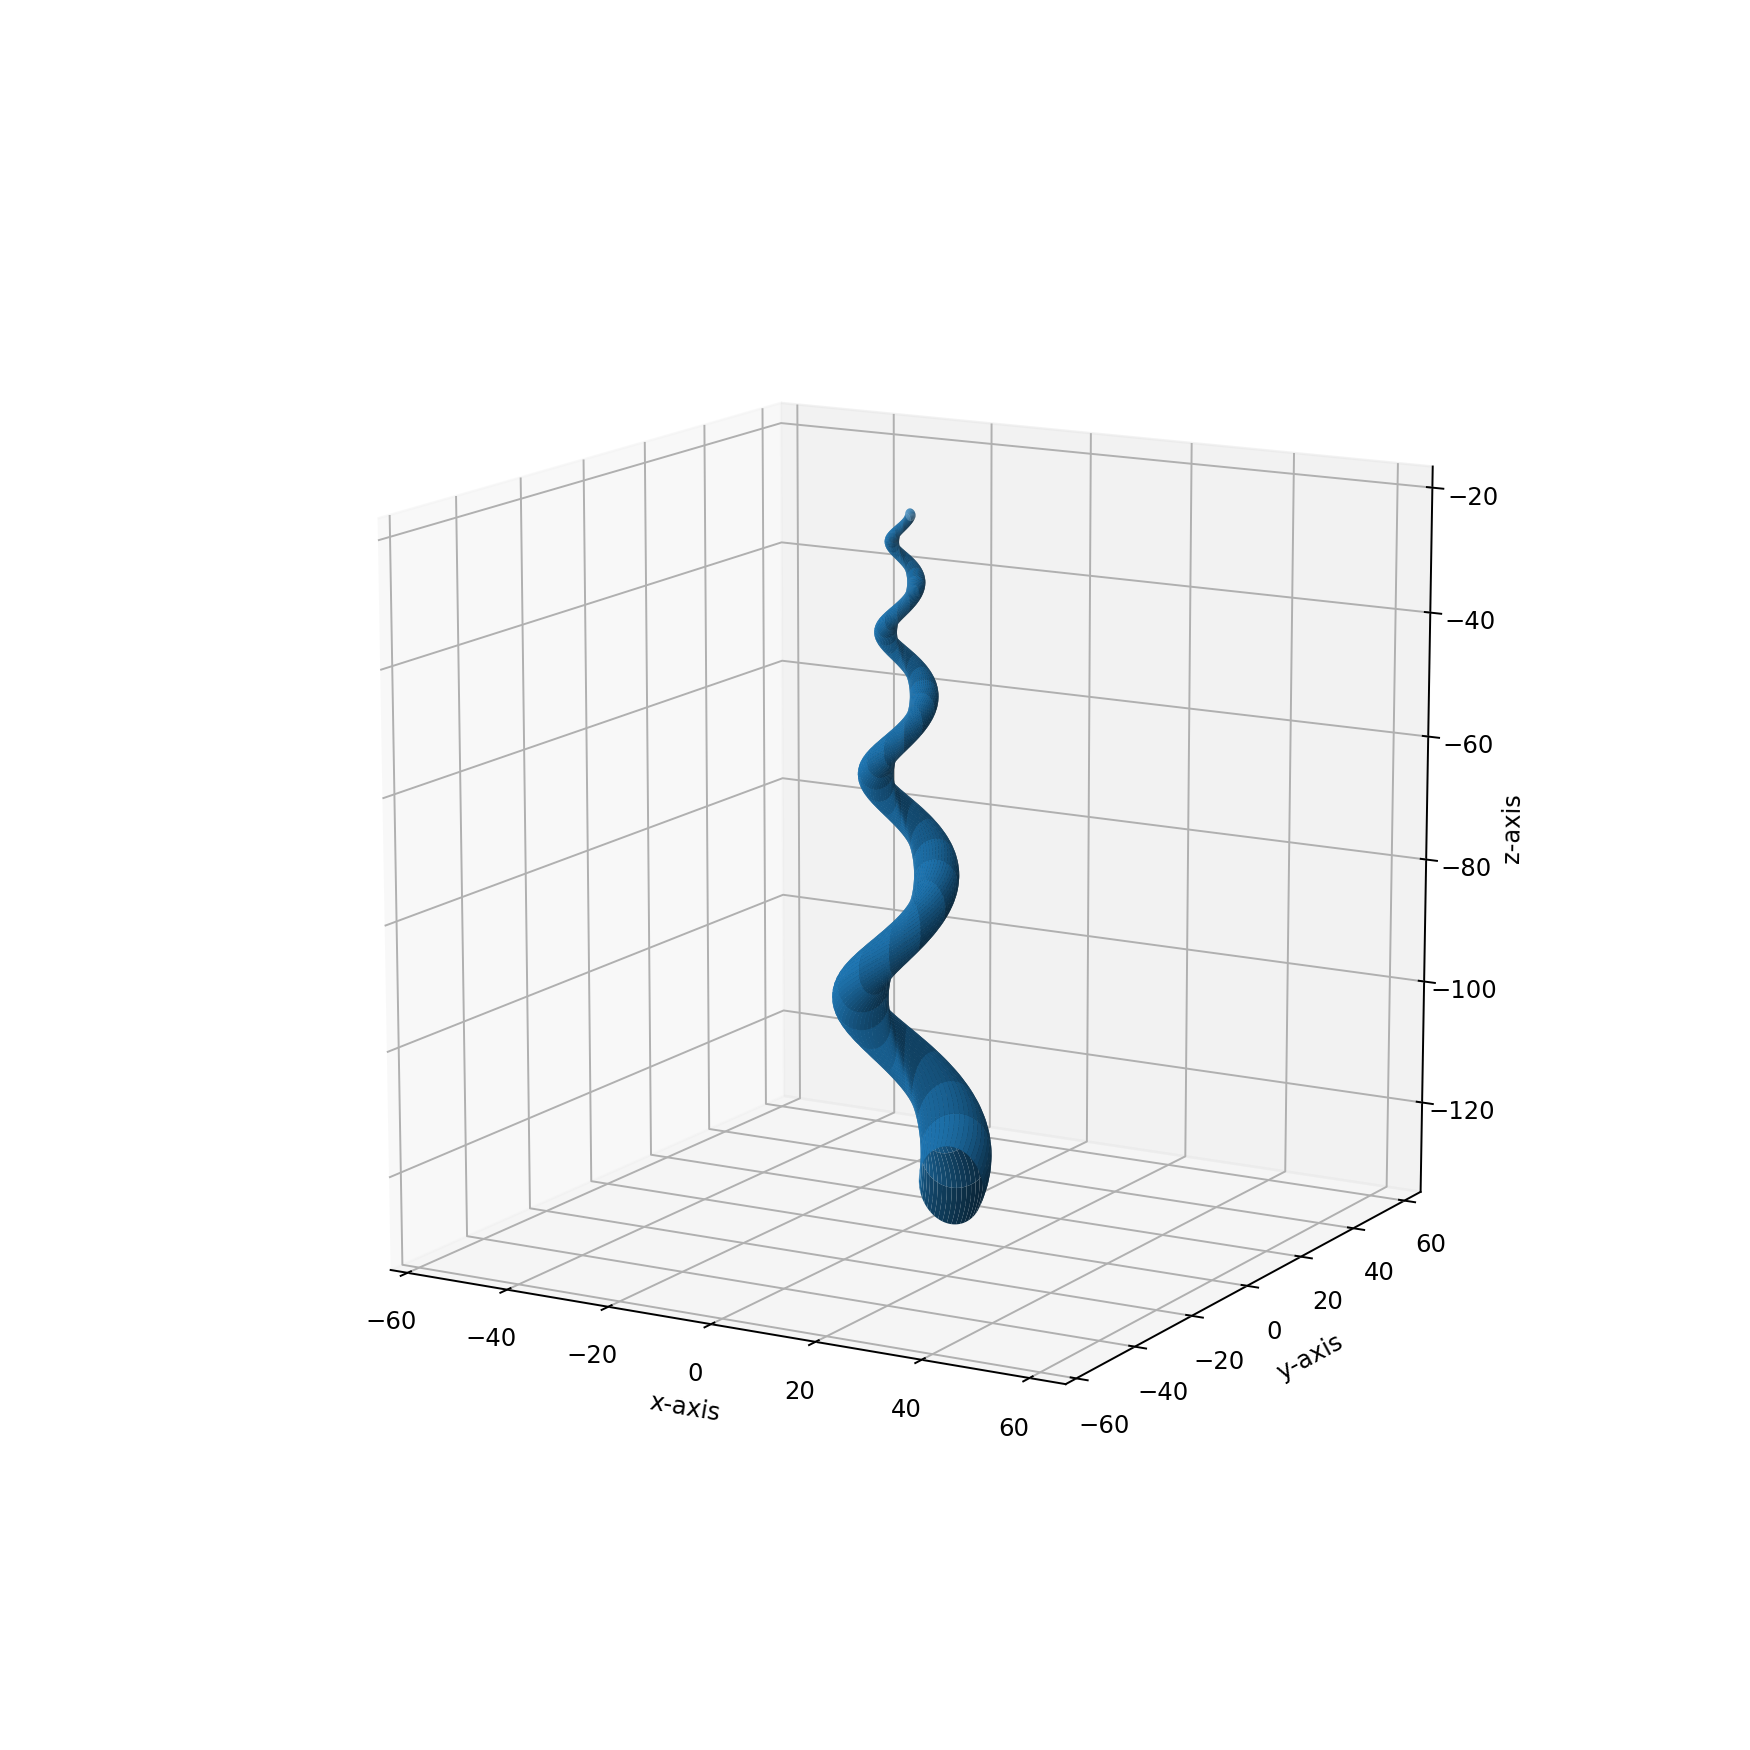

In [6]:
#プロット
plotSurf(x,y,z)

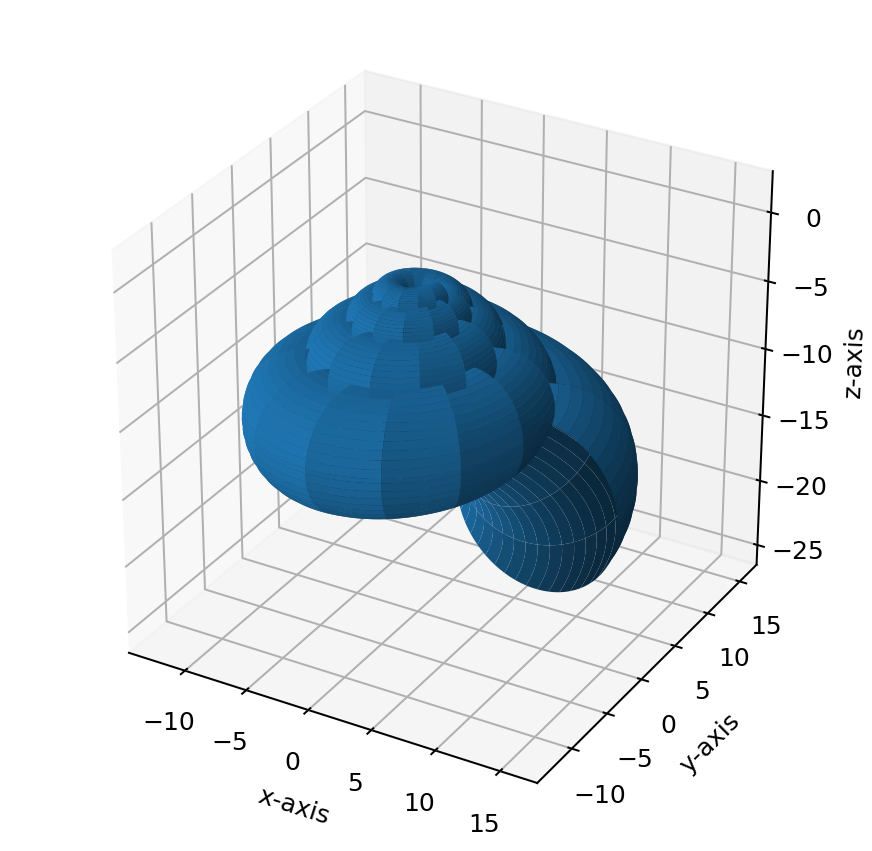

In [10]:
# ファイルへの出力
savefigSurf(x,y,z,"./test.png")